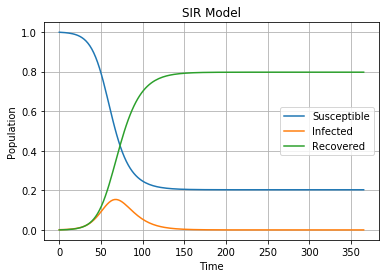

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# ODEs for SIR model
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial number of infected and recovered people, everyone else is susceptible to infection initially
I0 = 0.001
R0 = 0
N=1
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma
beta = 0.2
gamma = 0.1

# A grid of time points (in days)
t = np.linspace(0, 365, 160)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid()
plt.show()
